In [115]:
path = '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots'

In [116]:
import glob

In [117]:
files = glob.glob('%s/out_20171129_21*node*_cat[0-9]*_mjj/cat_opt.json' % path)

In [118]:
files

['/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots/out_20171129_211043_node_3_cat2_transformed_mjj/cat_opt.json',
 '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots/out_20171129_211043_node_8_cat2_transformed_mjj/cat_opt.json',
 '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots/out_20171129_211043_node_12_cat2_transformed_mjj/cat_opt.json',
 '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots/out_20171129_211043_node_SM_cat2_transformed_mjj/cat_opt.json',
 '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots/out_20171129_211043_node_5_cat2_transformed_mjj/cat_opt.json',
 '/mnt/t3nfs01/data01/shome/micheli/CMSSW_HHbbgg/CMSSW_8_0_26/src/diphotons/Utils/macro/outPlots/out_20171129_211043_node_9_cat2_transformed_mjj/cat_opt.json',
 '/mnt/t3nfs01/data01/shome/micheli/CM

In [119]:
import json 
import numpy as np

summary = { x:[] for x in ['node', 'cat', 'boundaries','ncat','fom','selections']  }

for fil in files:
    toks = fil.split('/')[-2].split('node_')
    name = toks[1].split('_')[0]
    cat = int(toks[1].split('_')[1].replace('cat',''))
    if name == 'SM': name = '0'
    node = int(name)
    with open(fil) as fin:
        info = json.loads(fin.read())
        fin.close()
    for key,val in info.items():
        val['node'] = node
        val['cat'] = cat
        val['boundaries'] = np.array(val['boundaries'])
        val['selections'] = np.array(val['selections']).astype(float)
        for col in summary.keys():
            summary[col].append( val[col] )

# print(summary)
    

In [120]:
import pandas as pd
df = pd.DataFrame(summary)

In [121]:
# df.set_index(['ncat','node'],drop=False,inplace=True# )

In [122]:
df.sort_index(inplace=True)
df

,boundaries,cat,fom,ncat,node,selections
0,"[1.01, 0.0]",2,-4.785,1,3,"[-30.104, -29.759]"
1,"[1.01, 0.0]",2,-1.164,1,8,"[-32.324, -28.393]"
2,"[1.01, 0.0]",2,-5.216,1,12,"[-31.655, -29.123]"
3,"[1.01, 0.0]",2,-2.632,1,0,"[-30.27, -30.0]"
4,"[1.01, 0.0]",2,-2.651,1,5,"[-30.765, -30.0]"
5,"[1.01, 0.0]",2,-1.917,1,9,"[-36.82, -27.267]"
6,"[1.01, 0.0]",2,-3.423,1,2,"[-32.14, -29.216]"
7,"[1.01, 0.0]",2,-5.496,1,13,"[-32.295, -28.865]"
8,"[1.01, 0.0]",2,-3.332,1,4,"[-32.193, -29.942]"
9,"[1.01, 0.0]",2,-3.632,1,7,"[-31.45, -29.59]"


In [123]:
from sklearn.cluster import KMeans

In [124]:
boundaries = []

# for ncats in [1]:
for row in df['selections']:
    boundaries.append( row )

In [125]:
boundaries = np.array(boundaries)

df['min_mjj'] = boundaries[:,1].ravel().astype(np.float)
df['max_mjj'] = -boundaries[:,0].ravel().astype(np.float)
#boundaries[:,:,1].shape

In [126]:
df['fom'] = -df['fom']

In [127]:
grouped = df.groupby('cat')

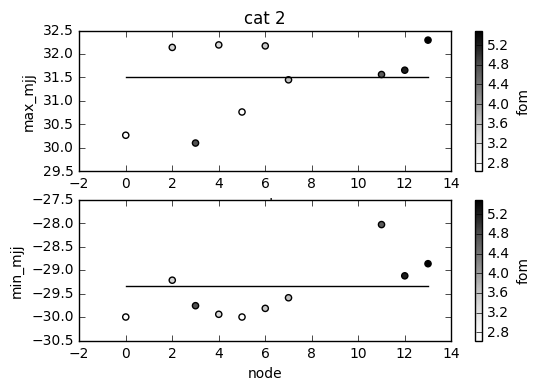

In [128]:
import matplotlib.pyplot as plt

avgs = []

for group in grouped.groups:
    grp = grouped.get_group(group)
    min_fom = np.percentile(grp['fom'],20.)
    grp = grp[ grp['fom'] > min_fom ]
    ax = plt.subplot(2,1,1)
    plt.title('cat %d' % group)
    grp.plot.scatter( 'node', 'max_mjj', c='fom', ax=ax)    
    max_avg = (grp['max_mjj'] * grp['fom']).sum() / grp['fom'].sum()
    ax.plot((0,13),(max_avg,max_avg),'k-')
    
    ax=plt.subplot(2,1,2)
    grp.plot.scatter( 'node', 'min_mjj', c='fom', ax=ax)
    min_avg = (grp['min_mjj'] * grp['fom']).sum() / grp['fom'].sum()
    ax.plot((0,13),(min_avg,min_avg),'k-')

    avgs.append([group,min_avg,max_avg])
    plt.show()

In [129]:
avgs

[[2, -29.33520218731761, 31.508073942500435]]

In [130]:
avgs = np.array(avgs)
round_to = 1.

In [131]:
rounded = np.round(avgs[:,1:3] / round_to)*round_to

In [132]:
rounded[:,1] = np.vstack( [rounded[:,1],np.ones_like(rounded[:,1])*35] ).min(axis=0)

In [133]:
rounded

array([[-29.,  32.]])

In [134]:
rounded+=125
rounded

array([[  96.,  157.]])